# Iris Species
---
## Data
The dataset contains data for the Iris species namely Iris-setosa, Iris-versicolor and Iris-virginica. Data for each specie is sepal width, sepal length, petal width and petal length and all are measured in cm. The objective is cluster the data into the different kind of species.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

In [2]:
iris = pd.read_csv('data/Iris.csv')
print(iris.shape)
print(iris.columns.tolist())

(150, 6)
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


The dataset contains 150 records, 50 for each specie and 6 fields.

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


---

## Variables
1. Id (numeric):
    * Entry index.
2. SepalLengthCm (numeric):
    * Measured in cm the length of the sepal of the iris flower.
3. SepalWidthCm (numeric):
    * Measured in cm the width of the sepal of the iris flower.
4. PetalLengthCm (numeric):
    * Measured in cm the length of the petal of the iris flower.
5. PetalWidthCm (numeric):
    * Measured in cm the width of the petal of the iris flower.
6. Species (categorical):
    * Type of iris specie.
---

## Basic description
Getting the basic description of the dataset of the numeric columns.

In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


---

## Cleaning data

In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dataset contains no missing data.
___

## Data exploration

In [6]:
iris.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

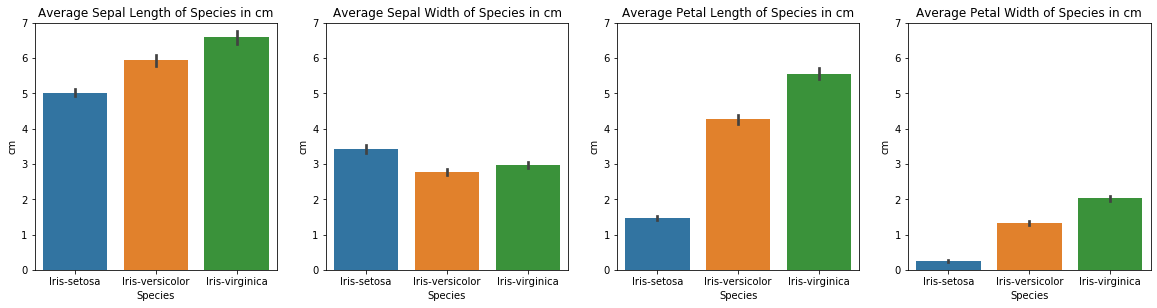

In [7]:
plt.subplots(figsize=(20,10))

plt.subplot(241)
sns.barplot(x='Species', y='SepalLengthCm', data=iris)
plt.title('Average Sepal Length of Species in cm')
plt.ylabel('cm')
plt.ylim(0,7)

plt.subplot(242)
sns.barplot(x='Species', y='SepalWidthCm', data=iris)
plt.title('Average Sepal Width of Species in cm')
plt.ylabel('cm')
plt.ylim(0,7)

plt.subplot(243)
sns.barplot(x='Species', y='PetalLengthCm', data=iris)
plt.title('Average Petal Length of Species in cm')
plt.ylabel('cm')
plt.ylim(0,7)

plt.subplot(244)
sns.barplot(x='Species', y='PetalWidthCm', data=iris)
plt.title('Average Petal Width of Species in cm')
plt.ylabel('cm')
plt.ylim(0,7)

plt.show()

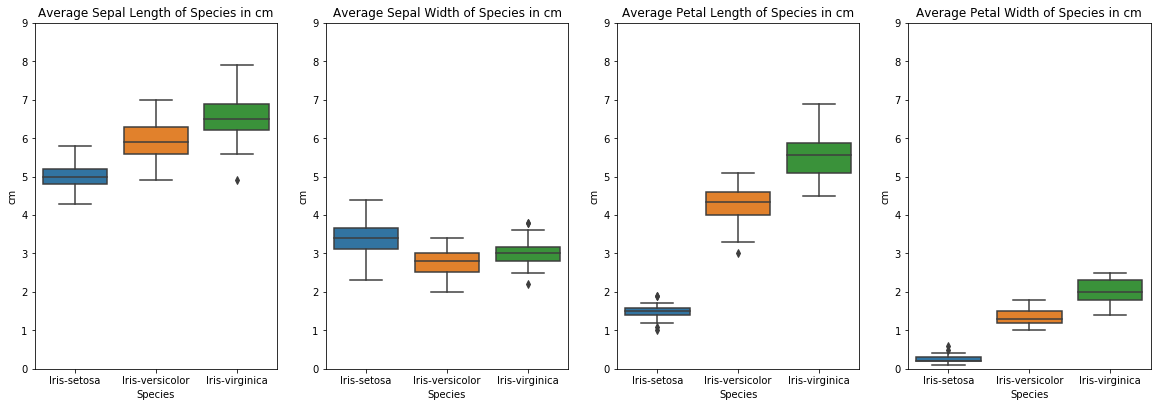

In [8]:
plt.subplots(figsize=(20,14))

plt.subplot(241)
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)
plt.title('Average Sepal Length of Species in cm')
plt.ylabel('cm')
plt.ylim(0,9)

plt.subplot(242)
sns.boxplot(x='Species', y='SepalWidthCm', data=iris)
plt.title('Average Sepal Width of Species in cm')
plt.ylabel('cm')
plt.ylim(0,9)

plt.subplot(243)
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)
plt.title('Average Petal Length of Species in cm')
plt.ylabel('cm')
plt.ylim(0,9)

plt.subplot(244)
sns.boxplot(x='Species', y='PetalWidthCm', data=iris)
plt.title('Average Petal Width of Species in cm')
plt.ylabel('cm')
plt.ylim(0,9)

plt.show()

In [9]:
le = LabelEncoder()
le.fit(iris.Species)
iris['LabelEncoded'] = le.transform(iris.Species)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,LabelEncoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


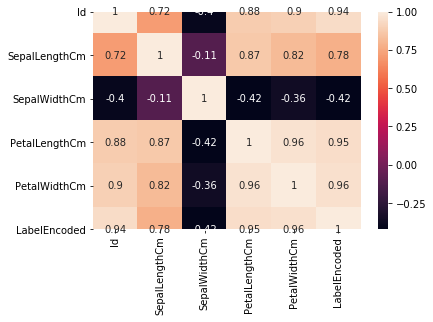

In [10]:
sns.heatmap(iris.corr(), annot=True)
plt.show()

In [11]:
print(pearsonr(iris.LabelEncoded, iris.SepalLengthCm))
print(pearsonr(iris.LabelEncoded, iris.PetalLengthCm))
print(pearsonr(iris.LabelEncoded, iris.PetalWidthCm))

(0.7825612318100813, 2.8904783526141205e-32)
(0.9490425448523337, 4.1554775794965405e-76)
(0.9564638238016175, 4.775002368754834e-81)


---

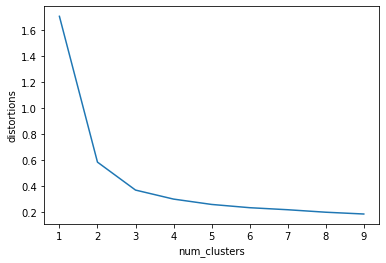

In [12]:
distortions = []
num_clusters = range(1, 10)

for i in num_clusters:
    cluster_centers, distortion = kmeans(iris[['PetalLengthCm', 'PetalWidthCm']], i)
    distortions.append(distortion)
    
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [13]:
cluster_centers, distortion = kmeans(iris[['PetalLengthCm', 'PetalWidthCm']], 3)

iris['cluster_labels'], distortion_list = vq(iris[['PetalLengthCm', 'PetalWidthCm']], cluster_centers)

In [14]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,LabelEncoded,cluster_labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,0


In [15]:
iris.groupby('cluster_labels')[['PetalLengthCm', 'PetalWidthCm']].mean()

,PetalLengthCm,PetalWidthCm
cluster_labels,,
0,1.464000,0.244000
1,5.595833,2.037500
2,4.269231,1.342308


### Observations - Cluster Mean
###### Petal Length
The mean of the petal length in cm for the three cluster are as follow:
* Cluster 0 has mean petal length of 4.269cm
* Cluster 1 with 5.595cm
* Cluster 2 with 1.464cm

###### Petal Width
* Cluster 0 has mean petal width of 1.342cm
* Cluster 1 with 2.037cm
* Cluster 2 with 0.244cm

In [16]:
iris.groupby('cluster_labels')['Id'].count()

cluster_labels
0    50
1    48
2    52
Name: Id, dtype: int64

### Observations - Cluster Count
The total number of records in each cluster:
* Cluster 0 has 50 flowers clustered to it
* Cluster 1 with 48
* Cluster 2 has 52

With this data the following can be deduced as we know that all three species has a total number of 50 records each and so two of cluster 1's records fall into cluster 2's record.

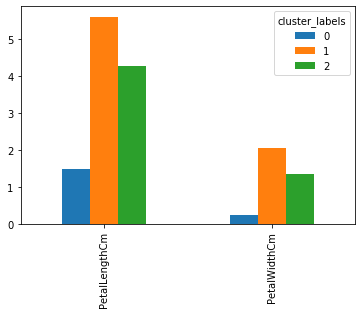

In [17]:
iris.groupby('cluster_labels')[['PetalLengthCm', 'PetalWidthCm']].mean().transpose().plot(kind='bar')
plt.show()

In [18]:
iris_group = iris.groupby('cluster_labels')[['PetalLengthCm', 'PetalWidthCm']].mean().transpose()
iris_group

cluster_labels,0,1,2
PetalLengthCm,1.464,5.595833,4.269231
PetalWidthCm,0.244,2.037500,1.342308


In [19]:
iris[iris.cluster_labels==0].Species.unique()

array(['Iris-setosa'], dtype=object)

In [20]:
iris[iris.cluster_labels==1].Species.unique()

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
iris[iris.cluster_labels==2].Species.unique()

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

---

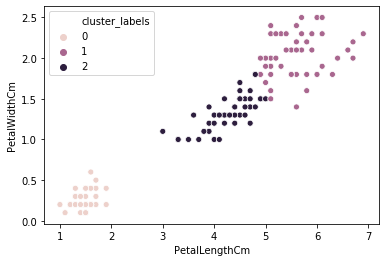

In [23]:
sns.scatterplot(iris.PetalLengthCm, iris.PetalWidthCm, hue=iris.cluster_labels)
plt.show()

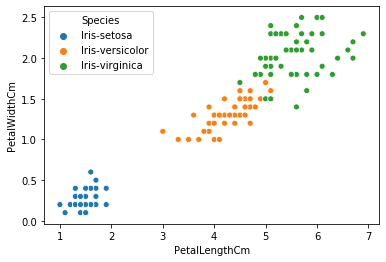

In [24]:
sns.scatterplot(iris.PetalLengthCm, iris.PetalWidthCm, hue=iris.Species)
plt.show()

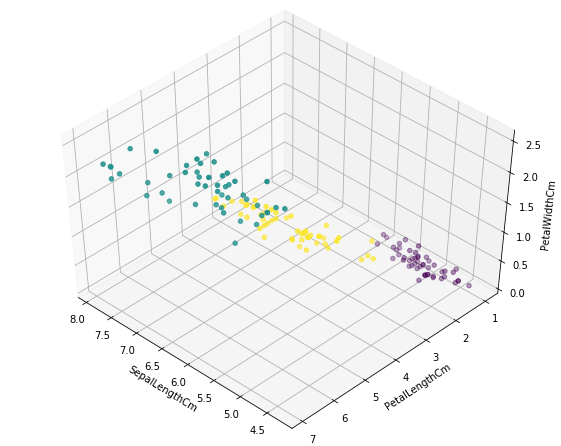

In [25]:
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')

ax.scatter(iris.SepalLengthCm, iris.PetalLengthCm, iris.PetalWidthCm, c= iris.cluster_labels.astype(np.float))


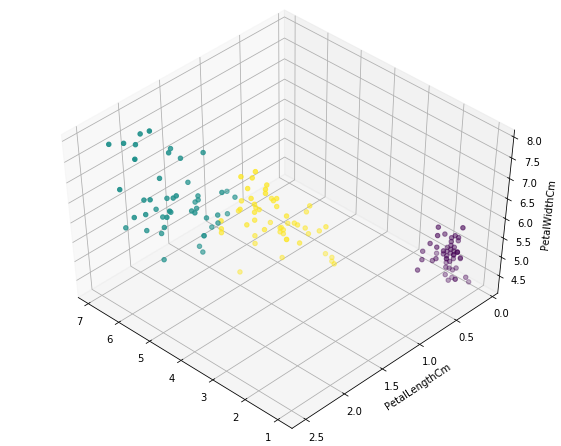

In [26]:
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')

ax.scatter(iris.PetalLengthCm, iris.PetalWidthCm, iris.SepalLengthCm, c= iris.cluster_labels.astype(np.float))


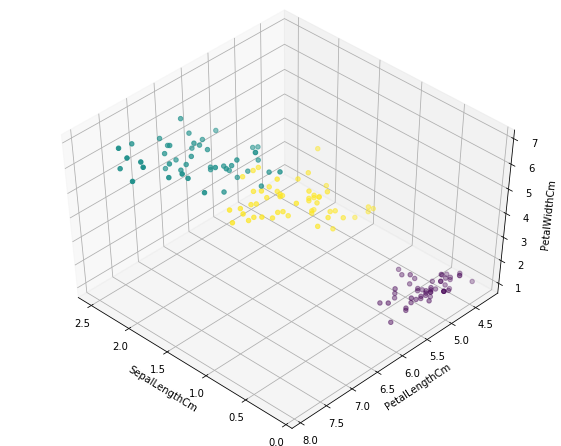

In [27]:
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')

ax.scatter(iris.PetalWidthCm, iris.SepalLengthCm, iris.PetalLengthCm, c= iris.cluster_labels.astype(np.float))
